#Reklam Harcamalarının Satış Üzerine Etkisi

In [ ]:
#Reklam harcamalarının satışlar üzerine etkisini çoklu doğrusal regresyon ile modelleme

## Kütüphaneleri yükle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#filter warnings
import warnings
warnings.filterwarnings("ignore")

## Veriyi Yükle

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BTK/day6/advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

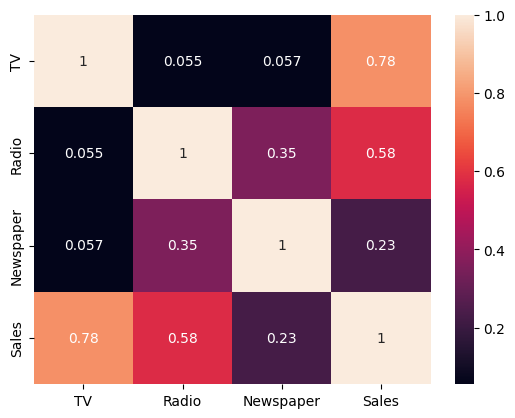

In [ ]:
#korelasyon
sns.heatmap(df.corr(),annot=True)

In [ ]:
#TV reklamları ile Sales arasında yüksek derecede korelasyon var.
#Radyo reklamları harcamaları ile satışlar arasında orta derecede bir korelasyon var.

In [ ]:
#Kütüphaneleri yükle
#veri setini bölmek için
from sklearn.model_selection import train_test_split

#Ölçeklendirme (Veri ön işleme)
from sklearn.preprocessing import StandardScaler

#Linear Regression (Modelleme)
from sklearn.linear_model import LinearRegression

#Değerlendirme
from sklearn.metrics import mean_squared_error,r2_score

## Özellikleri ve Hedef Sütunlarını Belirle

In [ ]:
X=df[["TV","Radio","Newspaper"]]
#X=df.drop("Sales",axis=1)
y=df["Sales"]

## Veri setini eğitim ve test olarak böl

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
#Random state=42 rastgele oluşturulan veri setlerinden 42 numaralı olanı al

## Modeli Oluştur

In [ ]:
lr=LinearRegression() #bir Linear regresyon nesnesi türet

## Modeli Eğit

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

## Tahminleri yap

In [ ]:
y_predict=lr.predict(X_test)


In [ ]:
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [ ]:
model_predict_actual=pd.DataFrame({"Predict":y_predict,"Actual":y_test})
model_predict_actual

,Predict,Actual
95,16.408024,16.9
15,20.889882,22.4
30,21.553843,21.4
158,10.608503,7.3
128,22.112373,24.7
115,13.105592,12.6
69,21.057192,22.3
170,7.461010,8.4
174,13.606346,11.5
45,15.155070,14.9


In [ ]:
model_predict_actual["Error"]=abs(model_predict_actual["Actual"]-model_predict_actual["Predict"])
model_predict_actual

,Predict,Actual,Error
95,16.408024,16.9,0.491976
15,20.889882,22.4,1.510118
30,21.553843,21.4,0.153843
158,10.608503,7.3,3.308503
128,22.112373,24.7,2.587627
115,13.105592,12.6,0.505592
69,21.057192,22.3,1.242808
170,7.461010,8.4,0.938990
174,13.606346,11.5,2.106346
45,15.155070,14.9,0.255070


In [ ]:
model_predict_actual.mean()

Predict    13.810021
Actual     13.712500
Error       1.460757
dtype: float64

## Değerlendirme

In [ ]:
print("R2 Score",r2_score(y_test,y_predict))

R2 Score 0.899438024100912


In [ ]:
#MSE ve RMSE hatalarının ortalaması ve hataların karelerinin kare kökü
print("MSE",mean_squared_error(y_test,y_predict))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict)))

MSE 3.1740973539761033
RMSE 1.78159966153345


In [ ]:
#R2 değeri 0-1 arasında değer alır. 1'e yaklaştıkça model mükemmel olur.

## Bu formülün katsayılarını ve sabit sayılarını bulmaya çalışıyoruz

## satışlar=Sabit+katsayı1Tv+katsayı2Radio+katsayı3Newspaper+Hata

In [ ]:
#katsayılar
print("katsayılar",lr.coef_) #katsayılar sütun sıralaması şeklinde ("TV - Radio - Newspaper")

katsayılar [0.04472952 0.18919505 0.00276111]


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#sabit terim
lr.intercept_

2.979067338122629

In [ ]:
#İlk örnek için satışı hesaplayalım
satış = 2.98 + (0.045*230) + (0.19*38) + (0.002*69)
print(satış)

20.688000000000002


## Özellikleri Standartlaştırma

In [ ]:
#standartlaştırma
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [ ]:
lr.fit(X_train_sc,y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(X_test_sc)

In [ ]:
mean_squared_error(y_test,y_predict)

3.5881633453968527

In [ ]:
mean_squared_error(y_test,y_predict)**.5

1.8942447955311512